In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

In [2]:
# Class of k-Nearest Neigbor Classifier

class kNN():
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. 
    #n-th row correponds 
    #to n-th instance.
    # Y_train is the output data (output vector): n-th element 
    #of Y_train is the output
    #value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train   
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. 
    #Rows correpond to instances
    #Method outputs prediction vector Y_pred_test:  
    #n-th element of Y_pred_test is the 
    #prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all 
        #the test instances in X_test 
        #is initialized to empty list []
   
        for i in range(len(X_test)):   #iterate over all 
        #instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th 
            #test_instance for all the train_instances 
            #in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between 
                #i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of 
                #distances of the i-th 
                #test_instance
        
            # Store distances in a dataframe. The dataframe has the 
            #index of Y_train in order to keep 
            #the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                    index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest 
            #points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains
            #indices in Y_train of the k-closed 
            #training instances to 
            # the i-th test instance. Thus, the dataframe 
            #self.Y_train[df_knn.index] contains the closses 
            #of those k-closed 
            # training instances. Method value_counts() computes the 
            #counts (number of occurencies) for 
            #each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains 
            #the class with the highest count; 
            #i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector 
            #Y_pred_test for all the test instances 
            #in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled 
    #instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance

    # getClassProbs method
    def getClassProbs(self, X_test):
        
        #class probabilities 
        prob_results = [] 
        
        #from given code above 
        for i in range(len(X_test)):   
            test_instance = X_test.iloc[i] 
            distances = []  
          
            for j in range(len(self.X_train)):  
                train_instance = self.X_train.iloc[j] 
                distance = self.Minkowski_distance(test_instance, 
                                                   train_instance) 
                distances.append(distance) 
        
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = 
                                    self.Y_train.index)
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            #calculate the probability of a class  and add it to the 
            #class probabilities
            prob = self.Y_train[df_knn.index].value_counts()/self.k
            prob_results.append(prob)
            
        df = pd.DataFrame(data=prob_results, index=X_test.index)
        return df
    
    
    
    # getPrediction method
    def getPrediction(self, X_test):
        
        #values assigned using regresion
        Y_reg_values = [] 
        
        #from given code above 
        for i in range(len(X_test)):   
            test_instance = X_test.iloc[i] 
            distances = []  
          
            for j in range(len(self.X_train)):  
                train_instance = self.X_train.iloc[j] 
                distance = self.Minkowski_distance(test_instance, 
                                                   train_instance) 
                distances.append(distance) 
        
            df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                    index = self.Y_train.index)
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # compute average of class values of all neighbors
            avg = 0
            for j in range(len(df_knn)):
                value = self.Y_train[df_knn.index[j]]
                avg += value
            avg = avg/self.k  
            Y_reg_values.append(avg)
            
        df = pd.DataFrame(Y_reg_values) 
        return df

In [4]:
# Normalize method
def normalize(X_train, X_test):
    # x = (x-min)/(max-min)
    X_train_norm = (X_train - X_train.min())/(X_train.max()-X_train.min())
    X_test_norm = (X_test - X_test.min())/(X_test.max() - X_test.min())
    return X_train_norm, X_test_norm

### Task B:

Text(0, 0.5, 'Accuracy')

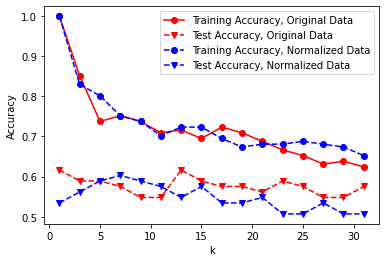

In [5]:
##################################################
# Working with glass data set
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34,
                                                    random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range)) #accuracy of original train data
testAcc = np.zeros(len(k_range))  #accuracy of original test data

trainAcc_norm = np.zeros(len(k_range)) #accuracy of normalized train data
testAcc_norm = np.zeros(len(k_range))  #accuracy of normalized test data


index = 0
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1  
    
    
index = 0 
X_train = normalize(X_train, X_test)[0] #normalizing the data 
X_test = normalize(X_train, X_test)[1]
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc_norm[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc_norm[index] = accuracy_score(Y_test, Y_predTest)
    index += 1     
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'rv--', k_range,trainAcc_norm,
         'b--o',k_range,testAcc_norm,'bv--')
plt.legend(['Training Accuracy, Original Data','Test Accuracy, Original Data', 
            'Training Accuracy, Normalized Data','Test Accuracy, Normalized Data'])
plt.xlabel('k')
plt.ylabel('Accuracy')


##### Results for `glass` data set:

From the resulting plot we can see that the difference between classification accuracy on original and normalized data is not significant. The point of normalization is to change the values of numeric columns in the dataset to a common scale, from 0 to 1. Normalization is needed when features have different ranges and/or contribute more towards accuracy. Therefore, from the result we can say that data set `glass` does not contain such features (different ranges and/or contribute more towards accuracy).

Text(0, 0.5, 'Accuracy')

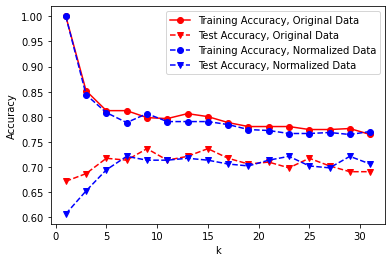

In [4]:
##################################################
# Working with diabetes data set
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
trainAcc_norm = np.zeros(len(k_range))
testAcc_norm = np.zeros(len(k_range))


index = 0
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1  
    
    
index = 0 
X_train = normalize(X_train, X_test)[0] #normalizing the data 
X_test = normalize(X_train, X_test)[1]
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc_norm[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc_norm[index] = accuracy_score(Y_test, Y_predTest)
    index += 1     
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'rv--', k_range,trainAcc_norm,
         'b--o',k_range,testAcc_norm,'bv--')
plt.legend(['Training Accuracy, Original Data','Test Accuracy, Original Data', 
            'Training Accuracy, Normalized Data','Test Accuracy, Normalized Data'])
plt.xlabel('k')
plt.ylabel('Accuracy')

##### Results for `diabetes` data set:

In this giveen data set`diabetes` the difference between classification accuracy on original and normalized data is even smoller than in the data set `glass` described before. Both classifications models, on the original and normalized data have approximately the same accuracy rate alont the entire range of `k`, the number of naighbors taken into accont for classification. That leads me to the same conclusion as in the part before, data set `diabetes` does not contain features that have different ranges and/or contribute more towards accuracy.

Text(0, 0.5, 'Accuracy')

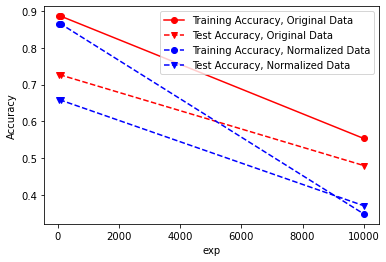

In [57]:
##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, 
                                                    random_state=12323)


# range for the values of parameter exp for kNN

exp_range = [50,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))
trainAcc_norm = np.zeros(len(exp_range))
testAcc_norm = np.zeros(len(exp_range))


index = 0
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1  
    
    
index = 0 
X_train = normalize(X_train, X_test)[0] #normalizing the data 
X_test = normalize(X_train, X_test)[1]
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc_norm[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc_norm[index] = accuracy_score(Y_test, Y_predTest)
    index += 1     
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'rv--', exp_range,trainAcc_norm,
         'b--o',exp_range,testAcc_norm,'bv--')
plt.legend(['Training Accuracy, Original Data','Test Accuracy, Original Data', 
            'Training Accuracy, Normalized Data','Test Accuracy, Normalized Data'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

##### Results for `glass` data set, different `exp` values:

Parameter `exp` is used in finding the Minkowski distance, that represents distance between two instances taking into account all of their attributes. Increasing `exp` to much leads to feature selection, maximum difference between any component of the instances. That is the reason of decreasing accuracy while increasing the value of `exp` for both original and normalize data. We can also notice that accuracy difference between training data is not fissible for small value of `exp` but while increasing, normalized trainig accuracy dicreases significantly in comparison to original training accuracy. However we cannot see the same result for tets accuracy. 

### Task C:

In [77]:
data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

clf = kNN(k = 31)
clf.fit(X_train, Y_train)
df = clf.getClassProbs(X_test).fillna(0)
print(df)

     'build wind float'  'build wind non-float'  'vehic wind float'  \
161            0.548387                0.225806            0.193548   
120            0.709677                0.161290            0.096774   
105            0.032258                0.419355            0.096774   
148            0.322581                0.483871            0.193548   
69             0.580645                0.225806            0.129032   
..                  ...                     ...                 ...   
165            0.548387                0.193548            0.193548   
204            0.258065                0.516129            0.193548   
72             0.032258                0.161290            0.000000   
121            0.516129                0.483871            0.000000   
43             0.419355                0.483871            0.096774   

     headlamps  containers  tableware  
161   0.032258    0.000000   0.000000  
120   0.032258    0.000000   0.000000  
105   0.354839    0.096774 

### Task D:

Text(0, 0.5, 'Mean Absolute Error')

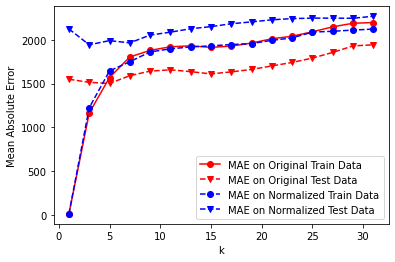

In [78]:
data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, 
                                                    random_state=10)

# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

meanAbsErr_Train = np.zeros(len(k_range)) #Mean Absolute Error on original 
#train data
meanAbsErr_Test = np.zeros(len(k_range))  #Mean Absolute Error on original 
#test data

meanAbsErr_Train_norm = np.zeros(len(k_range)) #Mean Absolute Error on normalized 
#train data
meanAbsErr_Test_norm = np.zeros(len(k_range))  #Mean Absolute Error on normalized 
#test data


index=0
for k in k_range:
        clf = kNN(k)
        clf.fit(X_train, Y_train)
        Y_predTrain = clf.getPrediction(X_train)
        Y_predTest = clf.getPrediction(X_test)
        meanAbsErr_Train[index] = mean_absolute_error(Y_train, Y_predTrain)
        meanAbsErr_Test[index] = mean_absolute_error(Y_test, Y_predTest)
        index += 1
        

index=0
X_train = normalize(X_train, X_test)[0] #normalizing the data 
X_test = normalize(X_train, X_test)[1]
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getPrediction(X_train)
    Y_predTest = clf.getPrediction(X_test)
    meanAbsErr_Train_norm[index] = mean_absolute_error(Y_train, Y_predTrain)
    meanAbsErr_Test_norm[index] = mean_absolute_error(Y_test, Y_predTest)     
    index += 1  

# plot the results:

plt.plot(k_range,meanAbsErr_Train,'ro-',k_range,meanAbsErr_Test,'rv--', 
         k_range,meanAbsErr_Train_norm,'b--o',k_range,meanAbsErr_Test_norm,'bv--')
plt.legend(['MAE on Original Train Data','MAE on Original Test Data', 
            'MAE on Normalized Train Data','MAE on Normalized Test Data'])
plt.xlabel('k')
plt.ylabel('Mean Absolute Error')
    